In [287]:
#mounting the drive to the google colab
from google.colab import drive
drive.mount ('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [288]:
# all the necessary library which will be needded 
#here i have used keras and tensorflow library for predicting the regression model 
import pandas as pd
from sklearn.model_selection import train_test_split   
import numpy as np  
import re
import os
from sklearn import preprocessing
from sklearn.model_selection import KFold
from math import sqrt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Conv1D,Dropout,MaxPooling1D,Flatten
from tensorflow.keras.models import Model, load_model,Sequential
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import csv

# Question 1(Preprocessing Part)

In [289]:
#---------------------------------------------------preprocessing part of the project(most challenging part:))--------------------------------------------------
#here i simply reading the all 1000 file making int o string and using some regular expression trics i have cleaned the data and took only value is digit 
# and then stored them into the X list which are all the time required for the every doctor to every patient for treatment
# and also stored optimized value into the Y
# it will take some time to run this cell coz will go through all the 1000 file
X = []
Y = []
# !jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10
for j in range(1000):
  s = ""
  with open('/content/drive/My Drive/Assignment 2 - Question/Assignment 2 - Question/DS/data'+str(j)+'.csv') as csvfile: # I have uploaded the whole folder to the google drive so reading from there
      Y.append(float(csvfile.readline()[15:])) # fetching the optimized value 
      for i in csvfile.readlines():   
        s+=i      #concating one file data to the string so can use regular expression  
  number_list = [int(i) for i in re.split(']| |[[|\n|[|]|]]',s) if i.isdigit()] # used RE and checked for the digit with list comprehhansion
  X.append(number_list)
  # print(number_list)
  csvfile.close()


In [290]:
#converting the Y into the numpy array
Y = np.array(Y)
# print(Y.shape)
Y = np.reshape(Y, (-1, 1))
# print(len(X))
print(Y)

[[1606.]
 [1714.]
 [1936.]
 [1811.]
 [1890.]
 [1937.]
 [1713.]
 [1721.]
 [1706.]
 [1775.]
 [1785.]
 [1696.]
 [1754.]
 [1618.]
 [1800.]
 [1733.]
 [1767.]
 [1701.]
 [1781.]
 [1788.]
 [1731.]
 [1585.]
 [1625.]
 [1835.]
 [1756.]
 [1799.]
 [1723.]
 [1709.]
 [1827.]
 [1642.]
 [1726.]
 [1695.]
 [1730.]
 [1715.]
 [1714.]
 [1839.]
 [1674.]
 [1855.]
 [1578.]
 [1757.]
 [1726.]
 [1779.]
 [1692.]
 [1863.]
 [1809.]
 [1744.]
 [1747.]
 [1836.]
 [1674.]
 [1792.]
 [1757.]
 [1728.]
 [1779.]
 [1661.]
 [1768.]
 [1850.]
 [1630.]
 [1757.]
 [1738.]
 [1830.]
 [1693.]
 [1744.]
 [1712.]
 [1546.]
 [1781.]
 [1686.]
 [1768.]
 [1747.]
 [1634.]
 [1965.]
 [1781.]
 [1665.]
 [1565.]
 [1748.]
 [1819.]
 [1835.]
 [1702.]
 [1771.]
 [1681.]
 [1855.]
 [1668.]
 [1531.]
 [1756.]
 [1629.]
 [1771.]
 [1911.]
 [1665.]
 [1596.]
 [1646.]
 [1556.]
 [1746.]
 [1659.]
 [1858.]
 [1924.]
 [1737.]
 [1878.]
 [1671.]
 [1826.]
 [1654.]
 [1788.]
 [1784.]
 [1686.]
 [1722.]
 [1806.]
 [1851.]
 [1681.]
 [1809.]
 [1778.]
 [1680.]
 [1904.]
 [1824.]
 

In [291]:
Y.shape

(1000, 1)

In [292]:
#-----------------------------------Splitting the training anf tesing the data---------------------------------------------------
#used minmax scalaer as there are many scaler techanique but it gave me good rmse score so i stick to it
from sklearn.model_selection import train_test_split
mm_scaler = preprocessing.MinMaxScaler()
main_x_minmax = mm_scaler.fit_transform(X)
main_y_minmax  = mm_scaler.fit_transform(Y)
print(main_x_minmax.shape)
# splitting the training and testing data using keras train_test_split method with test_size 
X_train, X_test, Y_train, Y_test = train_test_split(main_x_minmax,main_y_minmax, test_size=0.25, random_state=42)

#used kfold techniqe for preprocessing 
# without this can also be done as this will creat some randomness so the model will have different exposure everytime
kfold = KFold(n_splits=5)
# print(kf.split(X_train))

(1000, 2500)


# Part of the Question 2

In [293]:
#--------------------------------------------------ANN model--------------------------------------------------------
#used basic ANN model for this regression problem ,used mean_squared_error and used Adam optimized and used relu as a activation function which will 
activationFunction='relu' # used relu for both ANN and CNN
def ANNModel():
    model = Sequential()
    model.add(Dense(100, input_dim = X_train.shape[1], activation=activationFunction))
    model.add(Dense(75, activation=activationFunction))
    model.add(Dense(50, activation=activationFunction))
    model.add(Dense(25, activation=activationFunction))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['accuracy'])
    return model

model = ANNModel()
model.summary() #Printing the summary of the model

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_117 (Dense)            (None, 100)               250100    
_________________________________________________________________
dense_118 (Dense)            (None, 75)                7575      
_________________________________________________________________
dense_119 (Dense)            (None, 50)                3800      
_________________________________________________________________
dense_120 (Dense)            (None, 25)                1275      
_________________________________________________________________
dense_121 (Dense)            (None, 1)                 26        
Total params: 262,776
Trainable params: 262,776
Non-trainable params: 0
_________________________________________________________________


In [294]:
#--------------------running the ANN model--------------------
import time
temp1 = time.time()
for train_index, test_index in kfold.split(X_train):
  # print(train_index,test_index)
  x_train, x_val = X_train[train_index], X_train[test_index]
  y_train, y_val = Y_train[train_index], Y_train[test_index]
  history = model.fit(x_train, y_train, validation_data = (x_val, y_val),batch_size = 1,epochs = 50) # Setting the hyperparameter
temp2 = time.time()


Epoch 1/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0489 - accuracy: 0.0000e+00 - val_loss: 0.1540 - val_accuracy: 0.0067
Epoch 2/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0453 - accuracy: 0.0000e+00 - val_loss: 0.0343 - val_accuracy: 0.0000e+00
Epoch 3/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0332 - accuracy: 0.0000e+00 - val_loss: 0.0353 - val_accuracy: 0.0000e+00
Epoch 4/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0285 - accuracy: 0.0000e+00 - val_loss: 0.0348 - val_accuracy: 0.0000e+00
Epoch 5/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0207 - accuracy: 0.0000e+00 - val_loss: 0.0369 - val_accuracy: 0.0000e+00
Epoch 6/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0125 - accuracy: 0.0000e+00 - val_loss: 0.0431 - val_accuracy: 0.0000e+00
Epoch 7/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0077 - accuracy: 0.0000e+00 

In [295]:
print(f"time required to run the ANN model for traing is {temp2-temp1}")

time required to run the ANN model for traing is 465.33650302886963


# Part of the question3 (saving and loading the model) 

In [296]:
#saving the model to appropriate location
model.save('/content/drive/My Drive/1107736_ann.h5')

In [297]:
# Loading the saved model for predicting the rest of the data from the same location where initially saved
saved_model = tf.keras.models.load_model('/content/drive/My Drive/1107736_ann.h5')
yPredict = saved_model.predict(X_test)
print("RMSE of the model is: ", sqrt(mean_squared_error(Y_test, yPredict)))

RMSE of the model is:  0.20341949763743963


# Part of the Question 4

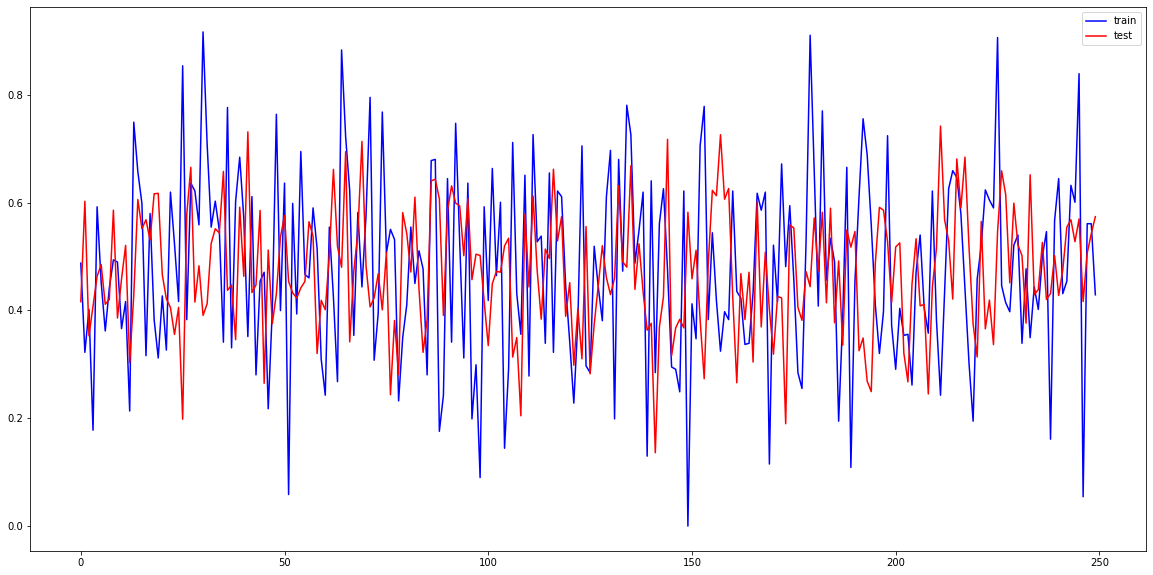

In [298]:
#plotting the figure using pyplot library which wiil show the traing and testing comparison of the data
#Blue line shows the training value red is for the predicted value
plt.figure(figsize = (20,10))
plt.plot(Y_test,color='blue', label='train')
plt.plot(yPredict, color='red', label='test')
plt.legend()
plt.show()

# Part of the Question 2

In [299]:
#This is the basic cnn model where i have used convolution 1d layer, Dropout layer, maxpooling layer as well as dropout layer
#As our problem is related to the linear have used linear activation  
# tried different optimizer but this one is more suitable 
def getModelCNN():
    model = Sequential()
    
    model.add(Conv1D(100, kernel_size = 5, 
                     activation = activationFunction, #used relu as already defined above is the best for the CNN model as given in documention 
                     input_shape = (2500, 1))) #here i have used 2500*1 matrix  as we have 2500 data per file or in one list 
    model.add(Dropout(0.1))
    model.add(MaxPooling1D(pool_size=1))
    
    model.add(Conv1D(50, 
                     kernel_size=3, 
                     activation=activationFunction))
    model.add(Dropout(0.1))
    model.add(MaxPooling1D(pool_size=1))
    
    model.add(Conv1D(50, 
                     kernel_size=3, 
                     activation=activationFunction))
    model.add(Dropout(0.1))
    model.add(MaxPooling1D(pool_size=1))
    
    model.add(Flatten())    # flatten for reducing the dimension
    model.add(Dense(100, 
                    activation=activationFunction))
    model.add(Dropout(0.1))
    model.add(Dense(50, 
                    activation=activationFunction))
    
    model.add(Dense(1, activation = 'linear'))
    model.compile(optimizer='RMSprop', loss='mean_squared_error',metrics=['accuracy']) #used RMSprop for the optimizer and loss using the mean_squread_error and returning the model
    
    return model

modelCNN = getModelCNN()
modelCNN.summary() #printing the summary of the model

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_57 (Conv1D)           (None, 2496, 100)         600       
_________________________________________________________________
dropout_76 (Dropout)         (None, 2496, 100)         0         
_________________________________________________________________
max_pooling1d_57 (MaxPooling (None, 2496, 100)         0         
_________________________________________________________________
conv1d_58 (Conv1D)           (None, 2494, 50)          15050     
_________________________________________________________________
dropout_77 (Dropout)         (None, 2494, 50)          0         
_________________________________________________________________
max_pooling1d_58 (MaxPooling (None, 2494, 50)          0         
_________________________________________________________________
conv1d_59 (Conv1D)           (None, 2492, 50)        

In [301]:
# setting for the 3 dimension of the data so to expanding the dimension
X_train_expand = np.expand_dims(X_train, axis=2)
X_test_expand = np.expand_dims(X_test, axis=2)
print(X_train_expand.shape)
print(X_test_expand.shape)

(750, 2500, 1)
(250, 2500, 1)


In [302]:
#-----------------------------------------Training the model for the CNN model-------------------------------
temp3 = time.time()
for train_index, test_index in kfold.split(X_train_expand):
  x_train, x_val = X_train_expand[train_index], X_train_expand[test_index]
  y_train, y_val = Y_train[train_index], Y_train[test_index]

  history1 = modelCNN.fit(x_train, y_train, 
                      validation_data = (x_val, y_val), 
                      epochs = 50)
temp4 =time.time()

Epoch 1/50
19/19 [==============================] - 1s 68ms/step - loss: 215.5798 - accuracy: 0.0000e+00 - val_loss: 0.0336 - val_accuracy: 0.0000e+00
Epoch 2/50
19/19 [==============================] - 1s 55ms/step - loss: 0.1253 - accuracy: 0.0000e+00 - val_loss: 0.0622 - val_accuracy: 0.0000e+00
Epoch 3/50
19/19 [==============================] - 1s 55ms/step - loss: 0.0662 - accuracy: 0.0000e+00 - val_loss: 0.0588 - val_accuracy: 0.0000e+00
Epoch 4/50
19/19 [==============================] - 1s 55ms/step - loss: 0.0420 - accuracy: 0.0000e+00 - val_loss: 0.0521 - val_accuracy: 0.0000e+00
Epoch 5/50
19/19 [==============================] - 1s 55ms/step - loss: 0.0354 - accuracy: 0.0000e+00 - val_loss: 0.0660 - val_accuracy: 0.0000e+00
Epoch 6/50
19/19 [==============================] - 1s 54ms/step - loss: 0.0452 - accuracy: 0.0000e+00 - val_loss: 0.0489 - val_accuracy: 0.0000e+00
Epoch 7/50
19/19 [==============================] - 1s 55ms/step - loss: 0.0406 - accuracy: 0.0000e+00 -

In [303]:
print(f"time required to run the CNN model for traing is {temp4-temp3} seconds")

time required to run the CNN model for traing is 274.8348445892334 seconds


# Part of the question 3(saving and loading the model)

In [304]:
#saving the model 
modelCNN.save('/content/drive/My Drive/1107736_cnn.h5') 

In [305]:
# Loading the model
saved_CNN_model = tf.keras.models.load_model('/content/drive/My Drive/1107736_cnn.h5')
yPredict_CNN = saved_CNN_model.predict(X_test_expand)
print("RMSE of the model is: ", sqrt(mean_squared_error(Y_test, yPredict_CNN)))


RMSE of the model is:  0.18222958074273296


# Part of the Question 4(Visual represention of the)

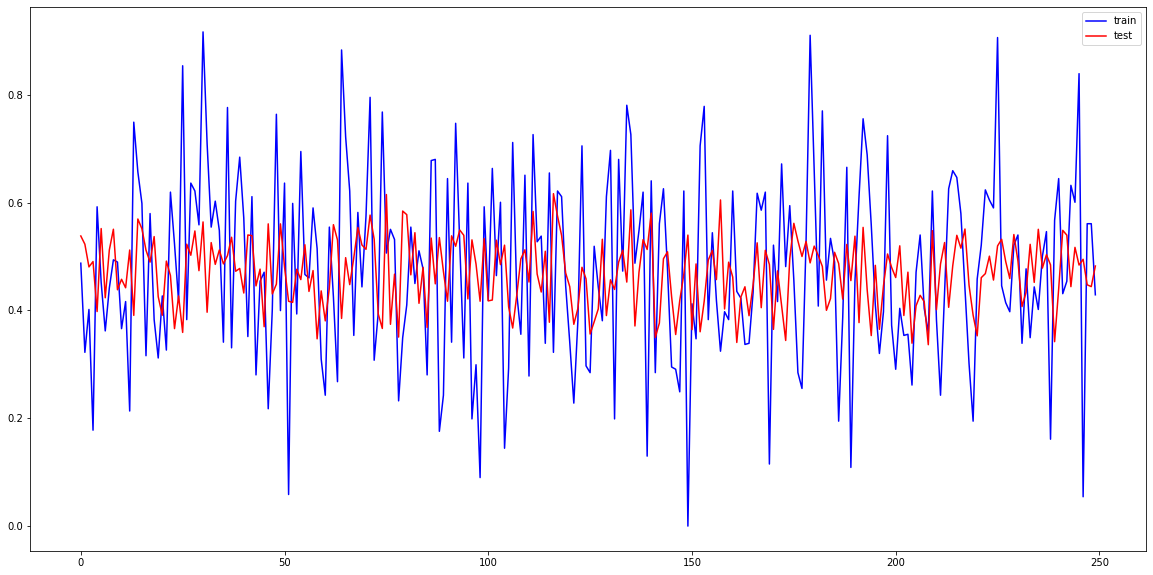

In [306]:
plt.figure(figsize = (20,10))
plt.plot(Y_test,color='blue', label='train')
plt.plot(yPredict_CNN, color='red', label='test')
plt.legend()
plt.show()

# ***Question5***(performance of the ANN and CNN)Comparing the loss of the both model ANN and CNN
which is given below 


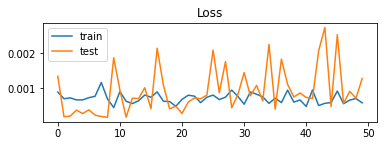

In [307]:
# Loss plot for the CNN model comparing the loss of the CNN model
plt.subplot(211)
plt.title('Loss')
plt.plot(history1.history['loss'], label='train')
plt.plot(history1.history['val_loss'], label='test')
plt.legend()

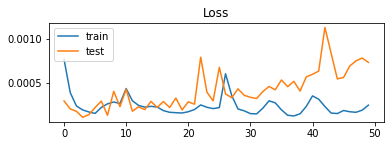

In [308]:
# Loss plot for the ANN model. comparing the loss of the ANN model
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

Comparing the loss of the ANN and CNN model in one graph which is given below. THis is on testing data of the file.

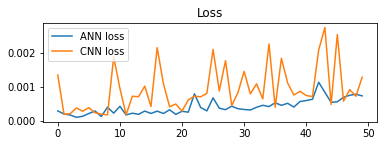

In [309]:
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['val_loss'], label='ANN loss')
plt.plot(history1.history['val_loss'], label='CNN loss')
plt.legend()

Comparing the loss of the ANN and CNN model in one graph which is given below. THis is on training data of the file.

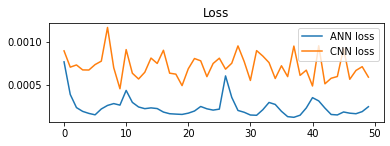

In [310]:
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='ANN loss')
plt.plot(history1.history['loss'], label='CNN loss')
plt.legend()